<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━╸━━━━━━━━━━━━━━━╸━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [17]:
import requests

# URL of the webpage to be downloaded
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Store the content of the response in the html_data variable
    html_data = response.text
else:
    print(f"Failed to download the webpage. Status code: {response.status_code}")

# Now you can work with the content stored in the html_data variable


Parse the html data using `beautiful_soup`.


In [18]:
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [25]:
table = soup.find('table', {'class': 'historical_data_table'})

# Extract the table data into a DataFrame
tesla_revenue = pd.read_html(str(table))[0]
    
# Rename columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']
    
# Display the DataFrame
print(tesla_revenue)

    Date  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112


In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing the tables
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the tables on the page
    tables = soup.find_all('table')

    # Check if there are at least two tables (zero-based index)
    if len(tables) >= 2:
        # Select the second table (index 1)
        second_table = tables[1]

        # Create an empty list to store the table data
        table_data = []

        # Iterate through the rows and cells of the second table and store the data in a list
        for row in second_table.find_all('tr'):
            row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
            table_data.append(row_data)

        # Convert the table data into a pandas DataFrame
        df = pd.DataFrame(table_data)

        # Print the last 10 rows of the DataFrame in tabular format
        print(df.tail(10))
    else:
        print("There are not enough tables on the page.")
else:
    print("Failed to retrieve the webpage.")


             0    1
45  2011-09-30  $58
46  2011-06-30  $58
47  2011-03-31  $49
48  2010-12-31  $36
49  2010-09-30  $31
50  2010-06-30  $28
51  2010-03-31  $21
52  2009-12-31     
53  2009-09-30  $46
54  2009-06-30  $27


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [50]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('[\$,]', '', regex=True)

AttributeError: Can only use .str accessor with string values!

Execute the following lines to remove an null or empty strings in the Revenue column.


In [10]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [13]:
tesla_data.tail(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3347,2023-10-16,250.050003,255.399994,248.479996,253.919998,88917200,0,0.0
3348,2023-10-17,250.100006,257.179993,247.080002,254.850006,93562900,0,0.0
3349,2023-10-18,252.699997,254.630005,242.080002,242.679993,125147800,0,0.0
3350,2023-10-19,225.949997,230.610001,216.779999,220.110001,170772700,0,0.0
3351,2023-10-20,217.009995,218.853806,210.419998,211.990005,136959880,0,0.0


In [4]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.tail(5)


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━━━━━━━━━━━━╸━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3347,2023-10-16,250.050003,255.399994,248.479996,253.919998,88917200,0,0.0
3348,2023-10-17,250.100006,257.179993,247.080002,254.850006,93562900,0,0.0
3349,2023-10-18,252.699997,254.630005,242.080002,242.679993,125147800,0,0.0
3350,2023-10-19,225.949997,230.610001,216.779999,220.110001,170772700,0,0.0
3351,2023-10-20,217.009995,218.860001,210.419998,211.990005,137734000,0,0.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [15]:
ticker_symbol = "GME"  
ticker = yf.Ticker(ticker_symbol)
revenue_data = ticker.quarterly_earnings
print(revenue_data)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [17]:
import requests

# URL of the webpage to be downloaded
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Store the content of the response in the html_data variable
    html_data = response.text
else:
    print(f"Failed to download the webpage. Status code: {response.status_code}")

# Now you can work with the content stored in the html_data variable


Parse the html data using `beautiful_soup`.


In [18]:
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [19]:
table = soup.find('table', {'class': 'historical_data_table'})

# Extract the table data into a DataFrame
gme_revenue = pd.read_html(str(table))[0]
    
# Rename columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']
    
# Display the DataFrame
print(gme_revenue)

    Date Revenue
0   2020  $6,466
1   2019  $8,285
2   2018  $8,547
3   2017  $7,965
4   2016  $9,364
5   2015  $9,296
6   2014  $9,040
7   2013  $8,887
8   2012  $9,551
9   2011  $9,474
10  2010  $9,078
11  2009  $8,806
12  2008  $7,094
13  2007  $5,319
14  2006  $3,092
15  2005  $1,843


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [7]:
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.tail(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5450,2023-10-09,14.77,15.500000,14.72,15.40,2276300,0.0,0.0
5451,2023-10-10,15.50,16.190001,15.40,16.00,2915900,0.0,0.0
5452,2023-10-11,16.01,16.090000,15.74,15.82,2098200,0.0,0.0
5453,2023-10-12,15.77,15.800000,14.82,15.09,3180300,0.0,0.0
5454,2023-10-13,14.92,15.110000,14.78,14.92,1823300,0.0,0.0
5455,2023-10-16,14.81,14.930000,14.15,14.43,3508600,0.0,0.0
5456,2023-10-17,14.25,14.830000,14.10,14.12,3842400,0.0,0.0
5457,2023-10-18,14.00,14.250000,13.81,13.85,4045800,0.0,0.0
5458,2023-10-19,13.80,13.850000,12.90,13.16,5808000,0.0,0.0
5459,2023-10-20,13.18,13.800000,13.12,13.44,3657600,0.0,0.0


In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing the tables
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the tables on the page
    tables = soup.find_all('table')

    # Check if there are at least two tables (zero-based index)
    if len(tables) >= 2:
        # Select the second table (index 1)
        second_table = tables[1]

        # Create an empty list to store the table data
        table_data = []

        # Iterate through the rows and cells of the second table and store the data in a list
        for row in second_table.find_all('tr'):
            row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
            table_data.append(row_data)

        # Convert the table data into a pandas DataFrame
        df = pd.DataFrame(table_data)

        # Print the last 10 rows of the DataFrame in tabular format
        print(df.tail(10))
    else:
        print("There are not enough tables on the page.")
else:
    print("Failed to retrieve the webpage.")


             0       1
53  2007-04-30  $1,279
54  2007-01-31  $2,304
55  2006-10-31  $1,012
56  2006-07-31    $963
57  2006-04-30  $1,040
58  2006-01-31  $1,667
59  2005-10-31    $534
60  2005-07-31    $416
61  2005-04-30    $475
62  2005-01-31    $709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


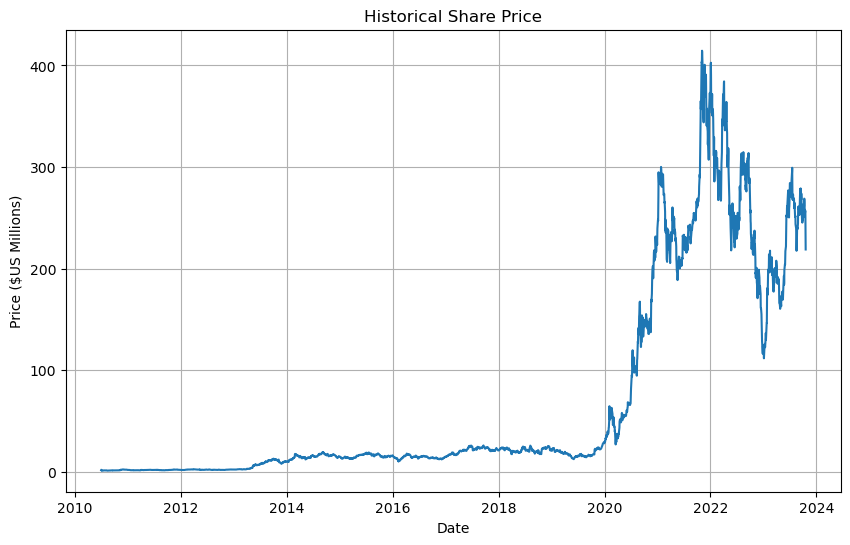

In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(tesla_data['Date'], tesla_data['High'])
plt.title('Historical Share Price')
plt.xlabel('Date')
plt.ylabel('Price ($US Millions)')
plt.grid(True)
plt.show()

                            Date  Revenue
0  1970-01-01 00:00:00.000002021  53823.0
1  1970-01-01 00:00:00.000002020  31536.0
2  1970-01-01 00:00:00.000002019  24578.0
3  1970-01-01 00:00:00.000002018  21461.0
4  1970-01-01 00:00:00.000002017  11759.0
5  1970-01-01 00:00:00.000002016   7000.0
6  1970-01-01 00:00:00.000002015   4046.0
7  1970-01-01 00:00:00.000002014   3198.0
8  1970-01-01 00:00:00.000002013   2013.0
9  1970-01-01 00:00:00.000002012    413.0
10 1970-01-01 00:00:00.000002011    204.0
11 1970-01-01 00:00:00.000002010    117.0
12 1970-01-01 00:00:00.000002009    112.0


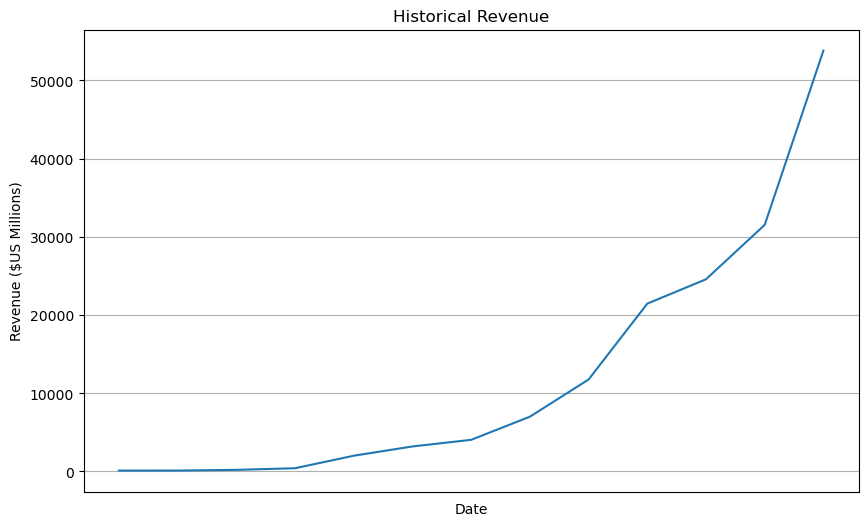

In [61]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL of the webpage containing the tables
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the tables on the page
    tables = soup.find_all('table')

    # Check if there are at least two tables (zero-based index)
    if len(tables) >= 2:
        # Select the second table (index 1)
        second_table = tables[1]

        # Create an empty list to store the table data
        table_data = []

        # Iterate through the rows and cells of the second table and store the data in a list
        for row in second_table.find_all('tr'):
            row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
            table_data.append(row_data)

        # Convert the table data into a pandas DataFrame
        df = pd.DataFrame(table_data)

    else:
        print("There are not enough tables on the page.")
else:
    print("Failed to retrieve the webpage.")
    
# Rename columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']
print (tesla_revenue)
tesla_revenue.dropna(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'])
plt.title('Historical Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue ($US Millions)')
plt.grid(True)
plt.show()

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


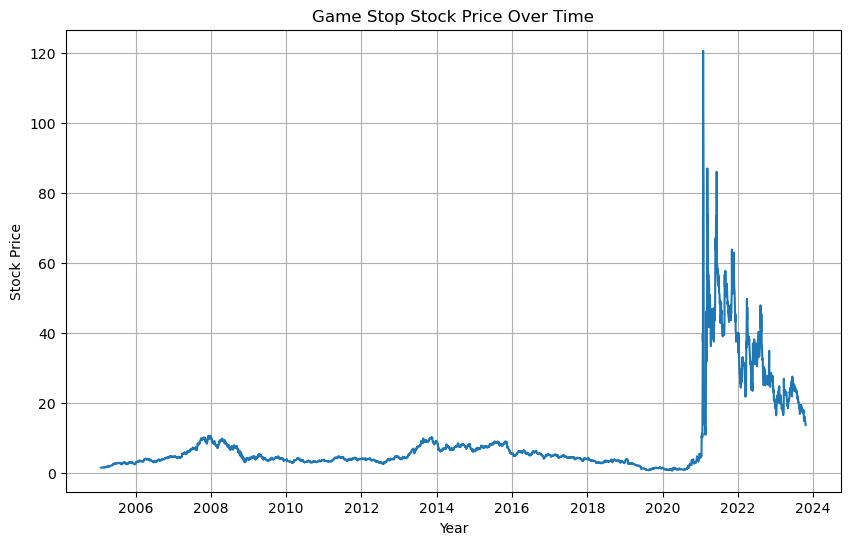

           Date       Open       High        Low      Close   Volume  \
0    2005-01-31   1.590672   1.611712   1.588989   1.606663  2201600   
1    2005-02-01   1.603295   1.626861   1.603295   1.621811  2048000   
2    2005-02-02   1.628545   1.688300   1.626862   1.686617  4252800   
3    2005-02-03   1.683250   1.683250   1.637802   1.650427  4172800   
4    2005-02-04   1.645377   1.668942   1.641169   1.654635  1685600   
...         ...        ...        ...        ...        ...      ...   
4709 2023-10-16  14.810000  14.930000  14.150000  14.430000  3508600   
4710 2023-10-17  14.250000  14.830000  14.100000  14.120000  3842400   
4711 2023-10-18  14.000000  14.250000  13.810000  13.850000  4045800   
4712 2023-10-19  13.800000  13.850000  12.900000  13.160000  5808000   
4713 2023-10-20  13.180000  13.800000  13.120000  13.440000  3657600   

      Dividends  Stock Splits  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3      

In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(gme_data['Date'], gme_data['High'])
plt.title('Game Stop Stock Price Over Time')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()
print (gme_data)

                                            Date Revenue
0   GameStop Quarterly Revenue(Millions of US $)    None
1                                     2020-04-30  $1,021
2                                     2020-01-31  $2,194
3                                     2019-10-31  $1,439
4                                     2019-07-31  $1,286
..                                           ...     ...
58                                    2006-01-31  $1,667
59                                    2005-10-31    $534
60                                    2005-07-31    $416
61                                    2005-04-30    $475
62                                    2005-01-31    $709

[63 rows x 2 columns]


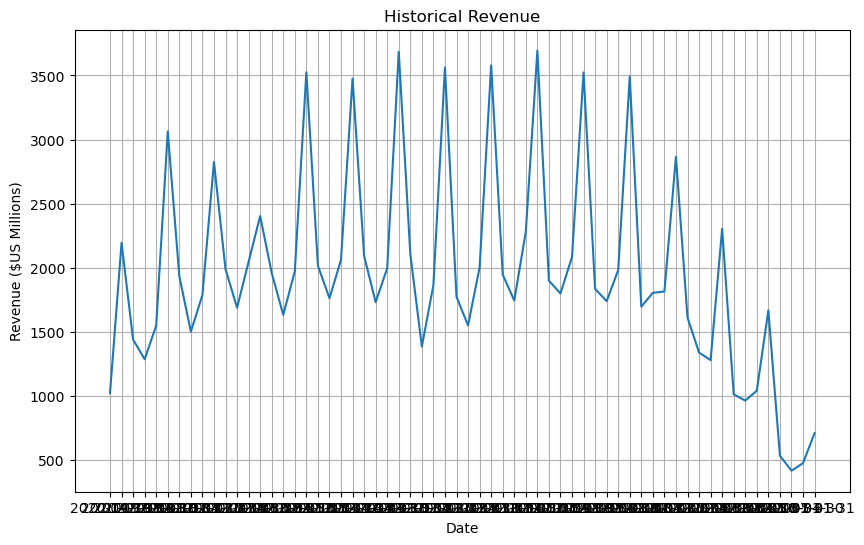

In [66]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL of the webpage containing the tables
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the tables on the page
    tables = soup.find_all('table')

    # Check if there are at least two tables (zero-based index)
    if len(tables) >= 2:
        # Select the second table (index 1)
        second_table = tables[1]

        # Create an empty list to store the table data
        table_data = []

        # Iterate through the rows and cells of the second table and store the data in a list
        for row in second_table.find_all('tr'):
            row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
            table_data.append(row_data)

        # Convert the table data into a pandas DataFrame
        gme_revenue = pd.DataFrame(table_data)

    else:
        print("There are not enough tables on the page.")
else:
    print("Failed to retrieve the webpage.")
    
# Rename columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']
print (gme_revenue)
gme_revenue.dropna(inplace=True)
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r'\D+', '', regex=True).astype('int')


plt.figure(figsize=(10, 6))
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'])
plt.title('Historical Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue ($US Millions)')
plt.grid(True)
plt.show()

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
